# Metody obliczeniowe w nauce i technice - Laboratoria 2

    

In [163]:
import numpy as np 
import networkx as nx
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## 1. Rozwiązywanie układu równań metodą eliminacji Gaussa

Klasa `GaussianElimination` rozwiązuje układ równań, używając metody eliminacji Gaussa. Przyjmuje kwadratową macierz współczynników \(A\) oraz wektor wyrazów wolnych \(B\).

### Complete Pivoting:

Metoda complete pivoting w eliminacji Gaussa to technika, w której element główny wybierany jest z największą wartością bezwzględną w danym kroku eliminacji. Eliminuje to błędy numeryczne, szczególnie przy źle uwarunkowanych macierzach układu równań.

### Operacje na Wierszach i Kolumnach:

Aby zaimplementowąć complete pivoting oraz w celu zwiększenia wydajności pamięciowej, operacje zamiany wierszy i kolumn są realizowane poprzez manipulację elementami tablic `row` i `column`. Początkowe tablice inicjalizowane są wartościami od 0 do \(n-1\), gdzie \(n\) to liczba kolumn i wierszy. Przy zamianie wierszy \(i\) oraz \(j\), odpowiednie indeksy w tablicy `row` są zamieniane.

### Back Substitution:

Wyniki są odczytywane za pomocą metody "back substitution", gdzie wartości zmiennych są wstawiane zgodnie z postacią górnotrójkątną macierzy po eliminacji Gaussa.

### Złożonośc czasowa:

Złożoność czasowa standardowej metody eliminacji Gaussa wynosi $O(n^3)$, complete pivoting utrzymuje tę złożoność, a back substitution wymaga $O(n^2)$ operacji.
Z tego wynika, że algorytm posiada asymptotyczną złożoność  $O(n^3)$

In [164]:
class GaussianElimination:
    #działa jedynie dla kwadratowych układów równań.
    def __init__(self, A, B):
        self.A = A                                          # macierz współczynników
        self.B = B                                          # wektor wyrazów wolnych
        self.size = len(A)                                  # wymiar macierzy 
        self.row = [i for i in range(self.size)]            # tablica odpowiadająca za indeksy wierszy
        self.column = [i for i in range(self.size)]         # tablica odpowiadająca za indeksy kolumn
        self.solution = [None for _ in range(self.size)]    # tablica z wyliczonym rozwiązaniem
        self.gaussian_elimination()                         # inicjalizajca algorytmu rozwiązującego 
            
    def swap_rows(self, i, j):
        self.row[i], self.row[j] = self.row[j], self.row[i] 

    def swap_columns(self, i, j):
        self.column[i], self.column[j] = self.column[j], self.column[i] 

    def multiply_row(self, i, x):
        self.B[self.row[i]] = self.B[self.row[i]] * x
        for j in range(self.size):
            self.A[self.row[i]][self.column[j]] = self.A[self.row[i]][self.column[j]] * x 

    def subtract_row(self, i, j, scal=1):
        self.B[self.row[i]] -= scal * self.B[self.row[j]]
        for k in range(self.size):
            self.A[self.row[i]][self.column[k]] -= scal * self.A[self.row[j]][self.column[k]]
        

    def find_pivot(self, i):                # znajduje największy co do wartości bezwzględnej element w podmacierzy (n-i) X (n-i)
        max_val = 0
        pivot_row = -1
        pivot_column = -1

        for row in range(i, self.size):
            for col in range(i, self.size):
                if abs(self.A[self.row[row]][self.column[col]]) > abs(max_val):
                    max_val = self.A[self.row[row]][self.column[col]]
                    pivot_row = row
                    pivot_column = col
        return pivot_row, pivot_column, max_val 
        
    def set_pivot(self, i):                 # zamienia miejscami wiersze i kolumny, tak by znaleziony pivot pojawił się na A[i][i]
        idx_row, idx_col, val = self.find_pivot(i)
        self.swap_columns(i, idx_col)
        self.swap_rows(i, idx_row) 
        if val !=0:
            self.multiply_row(i, 1/val) 
    
    def handle_column(self, col):           # znajduje pivota dla danej kolumny, ustawia go na odpowiednim miejscu, oraz przeprowadza zerowanie wartości pod przekątną 
        self.set_pivot(col) 
        for i in range(col + 1, self.size):
            self.subtract_row(i, col, self.A[self.row[i]][self.column[col]])
            self.A[self.row[i]][self.column[col]] = 0
    
    def back_substitution(self):
        for i in range(self.size - 1, -1, -1):
            self.solution[self.column[i]] = self.B[self.row[i]]
            for j in range(i - 1, -1, -1):
                self.B[self.row[j]] -= self.A[self.row[j]][self.column[i]] * self.solution[self.column[i]]

    def print_row(self,i):          #funkcje wypisujące (pomocne przy debugowaniu)
        for j in range(self.size):
            print(self.A[self.row[i]][self.column[j]],end =" ")
        print("]", end = " ")       
        print(self.B[self.row[i]],end="") 
        print() 

    def print_lin(self):            #funkcje wypisujące (pomocne przy debugowaniu)
        for i in range(self.size):
            print("[ ",end ="")
            self.print_row(i) 
            
        print()

    def gaussian_elimination(self):
        for i in range(self.size):
            self.handle_column(i) 
        self.back_substitution()

## 2. Rozwiązywanie układu równań wykorzystując Metode Gaussa-Jordana
Klasa `GaussJordan` rozwiązuje kwadratowy układ równań metodą Gaussa-Jordana, czyli doprowadza do postaci diagonalnej, zerując wyrazy zarówno pod jak i nad przekątną.

### Partial-Pivoting:
Tym razem algorytm implementuje jedynie partial-pivoting, czyli dla każdej kolumny znajdowany jest obecny największy element, w celu zminimalizowania błędów wynikających z arytmetyki zmiennoprzecinkowej.

Większa część kodu, jest dokładnie analogiczna (lub taka sama) jak w przypadku klasy `GaussianElimination`. Pomimo, że complete pivoting nie jest realizowany i tablica column nie jest konieczna, została zachowana ze względu na wygodę. 

### Odczytywanie Wyników:

Dzięki równoczesnemu zerowaniu elementów nad i pod przekątną, nie jest potrzebny mechanizm back-substitution, a wynik jest odczytywany od razu, wykorzystując wartości na przekątnej. 


In [165]:
class GaussJordan:

    def __init__(self, A, B):
        self.A = A
        self.B = B 
        self.size = len(A)
        self.row = [i for i in range(self.size)]
        self.column = [i for i in range(self.size)]
        self.solution = [None for _ in range(self.size)]
        self.gauss_jordan()
        
    def swap_rows(self, i, j):
        self.row[i], self.row[j] = self.row[j], self.row[i] 

    def swap_columns(self, i, j):
        self.column[i], self.column[j] = self.column[j], self.column[i] 

    def multiply_row(self, i, x):
        self.B[self.row[i]] = self.B[self.row[i]] * x
        for j in range(self.size):
            self.A[self.row[i]][self.column[j]] = self.A[self.row[i]][self.column[j]] * x 

    def subtract_row(self, i, j, scal=1):
        self.B[self.row[i]] -= scal * self.B[self.row[j]]
        for k in range(self.size):
            self.A[self.row[i]][self.column[k]] -= scal * self.A[self.row[j]][self.column[k]]
        
    def find_pivot(self, i):                                #funkcja realizuje jedynie partial-pivoting.
        max_val = 0
        pivot_row = -1
        for row in range(i, self.size):
                if abs(self.A[self.row[row]][self.column[i]]) > abs(max_val):
                    max_val = self.A[self.row[row]][self.column[i]]
                    pivot_row = row
        return pivot_row, max_val 
        
    def set_pivot(self, i):
        idx_row, val = self.find_pivot(i)
        self.swap_rows(i, idx_row) 
        if val !=0:
            self.multiply_row(i, 1/val) 
    
    def handle_column(self, col):
        self.set_pivot(col) 
        for i in range(col + 1, self.size):
            self.subtract_row(i, col, self.A[self.row[i]][self.column[col]])
            self.A[self.row[i]][self.column[col]] = 0

    
    def handle_column_reversed(self,col):       #mechanizm służący do zerowania wartości nad przekątną
        for i in range(0,col):
            self.subtract_row(i, col, self.A[self.row[i]][self.column[col]])
            self.A[self.row[i]][self.column[col]] = 0        

    def print_row(self,i):
        for j in range(self.size):
            print(self.A[self.row[i]][self.column[j]],end =" ")
        print("]", end = " ")       
        print(self.B[self.row[i]],end="") 
        print() 

    def print_lin(self):
        for i in range(self.size):
            print("[ ",end ="")
            self.print_row(i) 
            
        print()

    def read_solution(self):
        for i in range(self.size):
            self.solution[i] = self.B[self.row[i]]

    def gauss_jordan(self):
        for i in range(self.size):
            self.handle_column(i)               #zerowanie wartości pod każdą przekątną
        for i in range(self.size-1,-1,-1):
            self.handle_column_reversed(i)      #zerowanie wartości nad każdą przekątną (w odwrotnej kolejności)

        self.read_solution()

## 3. Znajdowanie rozkładu LU macierzy kwadratowej. 
Klasa `LUdecomposition` znajduję dla macierzy kwadratowej taką macierz górnotrójkątna \(U\) oraz dolnotrójkątna \(L\), aby zachodził warunek A = LU. 
Jest to przydatne między innymi przy rozwiązywaniu wielu układów równań z tą samą macierzą współczynników, a różnym wektorem wyrazów wolnych. 

### Implementacja:
Bazuje na wcześniej napisanych klasach. W praktyce metoda sprowadza się do modyfikacji eliminacji gaussa. W miejscu zer pod główną przekątną macierzy, wpisywane są wartości współczynników wykorzystanych do wyzerowania danego elementu. 
Metoda realizowana jest w miejscu. 
    


In [175]:
class LUdecomposition:

    def __init__(self, A, B=None):
        self.A = A
        if B is None:
            self.B = [0 for _ in range(len(A))]
        else:
            self.B = B 
        self.size = len(A)
        self.row = [i for i in range(self.size)]
        self.column = [i for i in range(self.size)]
        self.lu_decomposition()
            
    def swap_rows(self, i, j):
        self.row[i], self.row[j] = self.row[j], self.row[i] 

    def swap_columns(self, i, j):
        self.column[i], self.column[j] = self.column[j], self.column[i] 

    def multiply_row(self, i, x):
        self.B[self.row[i]] = self.B[self.row[i]] * x
        for j in range(self.size):
            self.A[self.row[i]][self.column[j]] = self.A[self.row[i]][self.column[j]] * x 

    def subtract_row(self, i, j, scal=1):                                       #funkjca subtract_row w porównaniu do GaussianElimination oraz GaussJordan uległa istotnej
                                                                                #zmianie polegającej na tym, że z powodu istotności wartości zapisanych po lewej stronie od
                                                                                #obecnie "zerowanego" miejsca, odejmowane są tylko wartości od pewnego miejsca. 
        self.B[self.row[i]] -= scal * self.B[self.row[j]]
        for k in range(j,self.size):
            self.A[self.row[i]][self.column[k]] -= scal * self.A[self.row[j]][self.column[k]] 
        

    
    def handle_column(self, col):
        y = self.A[self.row[col]][self.column[col]]
        for i in range(col + 1, self.size):
            x = self.A[self.row[i]][self.column[col]]
            self.subtract_row(i,col,x/y)         
            self.A[self.row[i]][self.column[col]] = x/y
    

    def print_row(self,i):
        for j in range(self.size):
            print(self.A[self.row[i]][self.column[j]],end =" ")
        print("]", end = " ")       
        print(self.B[self.row[i]],end="") 
        print() 

    def print_lin(self):
        for i in range(self.size):
            print("[ ",end ="")
            self.print_row(i) 
            
        print()

    def lu_decomposition(self):
        for i in range(self.size):
            self.handle_column(i) 

## 4. Testowanie poprawności klas `GaussianElimination`, `GaussJordan` oraz `LUdecomposition`.

Poprawnośc funkcji sprawdzana jest przy wykorzystaniu kolejno klas `GaussianElimnationTest`, `GaussJordanTest` oraz `LUdecompositionTest`.

### GaussianElimnationTest:
Bazuje na generowaniu losowych układów równań o wielkościach zadanych w tabeli `sizes`. Współczynniki macierzy to liczby losowe z przedziałów zadanych przez tablice `min_vals` i `max_vals`. Wygenerowany układ równań jest rozwiązywany z pomocą napisanej klasy, a następnie wynik jest porównywany z rozwiązaniem znalezionym przez funkcję z modułu numpy. 

### GaussJordanTest:
W pełni analogoicznie. 

### LUdecompositionTest:
Macierze generowane są analogicznie. Warunek równości sprawdzany jest za pomocą funkcji liczących normę z różnicy macierzu A oraz znalezionych LU.

In [169]:
class GaussianEliminationTest:
    def __init__(self,min_vals,max_vals,sizes):
        self.eps = 1e-8
        self.tests(min_vals,max_vals,sizes)
    
    def check_sol(self,sol1,sol2):
        for i in range(len(sol1)):
            if abs(sol1[i]-sol2[i]) > self.eps:
                return False 
        return True 
        
    def single_test(self,size,min,max):
        if max < min:
            min,max = max,min 
        A = np.random.uniform(min, max, size=(size, size))
        B = np.random.uniform(min,max, size =size)
        A2 = A.copy()
        B2 = B.copy()
        lin_alg = GaussianElimination(A2,B2) 
        my_sol = lin_alg.solution
        good_sol = np.linalg.solve(A,B)
        return self.check_sol(my_sol,good_sol)

    def tests(self,min_vals,max_vals,sizes):
        print("Gaussian elimination Tests")
        print("Solving...")
        s,minlen,maxlen = len(sizes), len(min_vals), len(max_vals)
        n = max(s,minlen,maxlen)
        counter = 0
        for i in range(n):
            if  self.single_test(sizes[i%s],min_vals[i%minlen],max_vals[i%maxlen]):
                print("Test ",i+1," passed") 
                counter +=1
            else:
                print("Test ",i+1," failed") 

        print("[",counter,"|",n,"]")
        return n==counter

In [180]:
class GaussJordanTest:
    def __init__(self,min_vals,max_vals,sizes):
        self.eps = 1e-8
        self.tests(min_vals,max_vals,sizes)
    
    def check_sol(self,sol1,sol2):
        for i in range(len(sol1)):
            if abs(sol1[i]-sol2[i]) > self.eps:
                return False 
        return True 
        
    def single_test(self,size,min,max):
        if max < min:
            min,max = max,min 
        A = np.random.uniform(min, max, size=(size, size))
        B = np.random.uniform(min,max, size =size)
        A2 = A.copy()
        B2 = B.copy()
        lin_alg = GaussJordan(A2,B2) 
        my_sol = lin_alg.solution
        good_sol = np.linalg.solve(A,B)
        return self.check_sol(my_sol,good_sol)

    def tests(self,min_vals,max_vals,sizes):
        print("Gauss-Jordan Tests")
        print("Solving...")
        s,minlen,maxlen = len(sizes), len(min_vals), len(max_vals)
        n = max(s,minlen,maxlen)
        counter = 0
        for i in range(n):
            if  self.single_test(sizes[i%s],min_vals[i%minlen],max_vals[i%maxlen]):
                print("Test ",i+1," passed") 
                counter +=1
            else:
                print("Test ",i+1," failed") 

        print("[",counter,"|",n,"]")
        return n==counter

In [184]:
class LUdecompositionTest:
    def __init__(self,min_vals,max_vals,sizes):
        self.eps = 1e-8
        self.tests(min_vals,max_vals,sizes)
    
    def upper(self,A):
        n = len(A) 
        C = [[0 for _ in range(n)] for _ in range(n) ]
        for i in range(n):
            for j in range(i,n):
                C[i][j] = A[i][j] 
        return C 
    
    def lower(self,A):
        n = len(A) 
        C = [[0 for _ in range(n)] for _ in range(n) ]
        for i in range(n):
            for j in range(i):
                C[i][j] = A[i][j] 
        for i in range(n):
            C[i][i] = 1 
        return C 
    
    def check_sol(self,A):
        A2 = deepcopy(A) 
        LA = self.lower(A)
        UA = self.upper(A) 
        lu = np.matmul(LA, UA)
        x =  np.linalg.norm(np.add(A2, -lu))

        return x
        
    def single_test(self,size,min,max):
        if max < min:
            min,max = max,min 
        A = np.random.uniform(min, max, size=(size, size))
        LUdecomposition(A) 
        return self.check_sol(A)

    def tests(self,min_vals,max_vals,sizes):
        print("LU Decomposition tests")
        print("Solving...")
        s,minlen,maxlen = len(sizes), len(min_vals), len(max_vals)
        n = max(s,minlen,maxlen)
        counter = 0
        for i in range(n):
            if  self.single_test(sizes[i%s],min_vals[i%minlen],max_vals[i%maxlen]):
                print("Test ",i+1," passed") 
                counter +=1
            else:
                print("Test ",i+1," failed") 

        print("[",counter,"|",n,"]")
        return n==counter

In [185]:
sizes = [2,5,10,15,20,30,40,50,70,100]
min_vals = [-100]
max_vals = [100]
GaussianEliminationTest(min_vals,max_vals,sizes)
GaussJordanTest(min_vals,max_vals,sizes)
LUdecompositionTest(min_vals,max_vals,sizes)

Gaussian elimination Tests
Solving...
Test  1  passed
Test  2  passed
Test  3  passed
Test  4  passed
Test  5  passed
Test  6  passed
Test  7  passed


Test  8  passed
Test  9  passed
Test  10  passed
[ 10 | 10 ]
Gauss-Jordan Tests
Solving...
Test  1  passed
Test  2  passed
Test  3  passed
Test  4  passed
Test  5  passed
Test  6  passed
Test  7  passed
Test  8  passed
Test  9  passed
Test  10  passed
[ 10 | 10 ]
LU Decomposition tests
Solving...
Test  1  passed
Test  2  passed
Test  3  passed
Test  4  passed
Test  5  passed
Test  6  passed
Test  7  passed
Test  8  passed
Test  9  passed
Test  10  passed
[ 10 | 10 ]


## 5. Znajdowanie natężęń prądów płynących w obwodzie elektrycznym. 

Na wejściu otrzymujemy graf nieskierowany ważony. Waga krawędzi reprezentuje opór elektryczny danej części obwodu. Dane są również dwa wierzchołki grafu, między którymi rozpięto siłę elektromotoryczną. Celem jest znalezienie natężeń prądów płynących w każdej części obwodu. 

Rozwiązanie bazuje na prawach Kirchoffa. 

## 5.1 Wykorzystanie I prawa Kirchoffa. 

I prawo Kirchoffa mówi o zerowej sumie natężeń prądów wpływających i wypływających z każdego węzła układu. 
Jeżeli układ posiada $n$ węzłów, daje nam to $n-1$ liniowo niezależnych równań. 
W rozważanym układzie równań, zmienne to wartości natężęń prądów w każdej krawędzi grafu, zatem $n-1$ (gdzie $n$ to liczba wierzchołków) równań to zdecydowanie za mało.

## 5.2 II prawo Kirchoffa - problem nadokreśloności układu.

II prawo Kirchofa dotyczy oczek, które w grafie reprezentowane są jako cykle. Suma spadku napięć na każdym oczku, powinna się równać zero.
Jeden cykl w grafie, pozwala ułożyć jedno równanie. Cykli w grafach jest zazwyczaj zdecydowanie więcej niż potrzebnych równań. Biorąc wszystkie równania, dostajemy układ nadokreślony, w którym liczba zmiennych jest mniejsza od liczby równań. Nadprogramowe cykle w grafach generują równania liniowo zależne od innych, jednak z powodu arytmetyki zmiennoprzecinkowej, badany układ równań komputer często określi jako wewnętrznie sprzeczny. 

Liniową zalezność równań zadanych przez cykle, prezentuje poniższy rysunek: 


![2cykle](images/dependant_cycle_graph.png)


W tym grafie, znajdują się 3 cykle: 

$(A,C,D)$,  $(A,C,B)$,  $(A,B,C,D)$.

Jeżeli spojrzymy na równania II prawa Kirchoffa zadane przez wszystkie 3 cykle, to okaże się, że znajdują się wśród nich jedynie 2 liniowo niezależne. 
Bierze się to z faktu, że 4-elementowy cykl jest "sumą" dwóch mniejszych. 

## 5.3 Znajdowanie cykli generujących liniowo niezależne równania.

Algorytm implementuje następujący schemat rozwiązywania problemu z nadokreślonością układu. 

Pojedynczy cykl w grafie jest znajdowany z użyciem przeszukiwania w głąb. Następnie po znalezieniu cyklu, z grafu usuwana jest dowolna (dla wygody pierwsza) jedna krawędź należąca do tego cyklu. Sprawia to, że następny znaleziony cykl będzie na pewno niezależny liniowo od poprzednich (ponieważ nie może się z nich "składać").

Poniżej krótki nieformalny dowód tego, że taka metoda faktycznie działa.

Zauważmy, że każdy cykl w grafie za pomocą zwijania krawędzi można sprowadzić do zwykłego trójkąta. Z tego powodu, wystarczy rozważać takie cykle. 

Rozważmy dwa cykle w grafie. Mogą wystąpić dwie sytuacje:

1. Dwa cykle są rozłaczne (nie istnieje wspólna krawędź).
2. Dwa cykle posiadają wspólne krawędzie. 

Rozważmy pierwszą sytuacje: Zwijajac zbędne krawędzie, możemy doprowadzić graf do takiej postaci: 

![2rozdzielnecykle](images/seperated_cycles.png)


Teraz, zupełnie oczywiste jest to, że po znalezieniu pierwszego cyklu, usunięcie dowolnej krawędzi nie wpływa na znalezienie drugiego.

Druga sytuacja, poprzez zwinięcie zbędnych krawędzi może być reprezentowana jako wcześniejszy rysunek (kwadrat z przekątną.) 


Przyjmijmy, że został znaleziony najpierw cykl $(A,B,C,D)$. Usunięcie dowolnej krawędzi tego cyklu jest równoważne (przez symetrie). 
W takim razie usuńmy krawędź $AB$. Zauważmy, że cykl $(A,C,D)$ dalej jest możliwy do znalezienia, natomiast trzeci, liniowo zależny cykl nie zostanie już znaleziony. 

W przypadku znalezienia krótszego cyklu najpierw (bez straty ogólności może to być cykl $(A,B,C)$) możemy usunąć albo zewnętrzną krawedź i sytuacja nie różni sie od wcześniej opisanej, albo przekątną kwadratu. Jeżeli usuniemy przekątną kwadratu, to nastepnie zostanie znaleziony duży cykl $(A,B,C,D)$, a trzeci liniowo zależny cykl, nie zostanie znaleziony.

Poniższe rysunki przedstawiają podane sytuacje:

![usuwanekrawedzie1](images/removed_edge_1.png)
![usuwanekrawedzie2](images/removed_edge_2.png)


## 5.4 Kierunek prądu 
Układ zadany jest jako graf nieskierowany, prąd zależnie od przyłożenia siły elektromotorycznej może płynąć w różnych kierunkach w różnych gałęziach układu.
W przypadku korzystania z II prawa Kirchoffa musimy założyć jakiś kierunek prądu w danym fragmencie obwodu. 

Zaimplementowany algorytm, zakłada przepływ prądu zawsze z wierzchołka o indeksie niższym w kierunku wierzchołka o indeksie wyższym. Końcowy wynik, w przypadku błędnego założenia początkowego zawiera po prostu ujemny znak natężenia prądu, łatwo więc zorientować się, w którym kierunku prąd płynąłby faktycznie w obwodzie.

## 5.5 Szczegóły implementacyjne

1. Algorytm przyjmuje graf w postaci ważonej listy krawędzi.

2. Ze względu wygodne automatyczne testowanie, algorytm jest zaimplementowany w taki sposób, że nie przyjmuje jako parametru węzłów do których przyłożona jest różnica napięć, tylko wybierane są automatycznie wierzchołki z pierwszej krawędzi z listy krawędzi. Wartość siły elektromotorycznej brana jest jako waga tej krawędzi.

3. Każda krawędź ma przyporządkowany unikalny indeks (wzięty jako indeks początkowej listy krawędzi). Jest to numer zmiennej odpowiadającej danej krawędzi. Indeksy przechowywane są w specjalnej tablicy. 

## 5.6 Krokowy opis algorytmu

1. Stworzenie listy sąsiedztwa na podstawie zadanej listy krawędzi grafu.

2. Inicjalizacja tablicy indeksów.

3. Stworzenie $(n-1)$ liniowo niezależnych równań na podstawie I prawa Kirhoffa. 

4. Wygenerowanie brakującej liczby równań przy pomoc znalezionych $e-(n-1)$ niezależnych cykli w grafie.

5. Rozwiązanie układu równań.

Funkcje pomocnicze służące do generowania listy sąsiedztwa na podstawie listy krawędzi:

In [3]:
def list_representation(G):
    maxedge = max(G, key=lambda x: max(x[0], x[1]))
    n = max(maxedge[0], maxedge[1]) + 1
    G2 = [[]for _ in range(n)]
    for v,u,w in G:
        G2[v].append(u)
        G2[u].append(v) 
    return G2,n 

def list_representation_weights(G):
    maxedge = max(G, key=lambda x: max(x[0], x[1]))
    n = max(maxedge[0], maxedge[1]) + 1
    G2 = [[]for _ in range(n)]
    for v,u,w in G:
        G2[v].append((u,w))
        G2[u].append((v,w)) 

    return G2,n 

Funkcje pomocnicze związane z znajdowaniem pojedycznego cyklu, usuwaniem krawędzi danego cyklu oraz znajdowanie $n$ cykli niezależnych:

In [195]:
def find_path(a,b,parent): # funkcja zwracająca na podstawie tablicy parent z DFS znalezioną ścieżke między a,b.
    if a is None and b is None:
        return None 
    cycle = [b] 
    curr = b 
    while parent[curr] != a:
        cycle.append(parent[curr])
        curr = parent[curr] 
    cycle.append(a)

    return cycle[::-1]


def find_cycle(G): #oparta na DFS funkcja znajdująca cykl.
    flag = False 
    a,b = None,None 
    n = len(G) 
    visited = [ False for _ in range(n)] 
    parent = [None for _ in range(n)] 
    def DFSVisit(G,u):
        nonlocal a,b, flag
        visited[u] = True 
        for v in G[u]: 
            if not flag and visited[v] and parent[u] != v:
                flag = True 
                a,b = v,u 
            if not flag and not visited[v]:
                parent[v] = u 
                DFSVisit(G,v)   
    for i in range(n):
        if not flag and not visited[i]:
            DFSVisit(G,i) 
        elif flag: 
            break 
    return find_path(a,b,parent) 

def remove_edge(G,a,b): #usuwanie krawędzi (a,b) z grafu
    a_idx = G[a].index(b) 
    b_idx = G[b].index(a) 
    G[a].pop(a_idx)
    G[b].pop(b_idx)     

def n_cycles(G,n): #znajdowanie n niezależnych cykli w grafie
    cycles = []
    for _ in range(n):
        cycle = find_cycle(G) 
        if not cycle is None:
            remove_edge(G,cycle[0],cycle[1]) 
            cycles.append(cycle) 
    return cycles 

def edges_index(edges,n,e): # funkcja inicjalizująca tablicę unikalnych indeksów dla każdej krawędzi
    IDX = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(e):
        u,v,_ = edges[i] 
        IDX[u][v] = i 
        IDX[v][u] = i 
    return IDX

Główna funkcja:

In [196]:
def electric_circuit(edges):  # funkcja rozwiązująca układ elektryczny, zadany jako lista krawędzi grafu z wagami jako wartościami oporu.
    e = len(edges)
    G,n = list_representation(edges) 
    G2 = deepcopy(G)
    IDX = edges_index(edges,n,e)

    def idx(a,b):
        nonlocal IDX
        sign = 1 

        if a < b:
            sign = -1

        return IDX[a][b],sign
    
    A = [[0 for _ in range(e)] for _ in range(e)]
    B = [0]*e

    for i in range(n-1):
        for v in G[i]:
            e_idx, _ = idx(i,v)
            if v > i:
                A[i][e_idx] = -1 
            else:
                A[i][e_idx] = 1 

    needed_cycles = e - n + 1
    cycles = n_cycles(G,needed_cycles) 
    curr_eq = n-1 

    for cycle in cycles:
        l = len(cycle) 
        u,v = cycle[l-1],cycle[0] 
        e_idx,sign = idx(u,v)
        if e_idx==0:
                B[curr_eq] = sign* edges[e_idx][2] 
        else:
                A[curr_eq][e_idx] = sign* edges[e_idx][2] 
        B[curr_eq]
        for i in range(l-1):
            u,v = cycle[i],cycle[i+1] 
            e_idx,sign = idx(u,v) 
            if e_idx==0:
                B[curr_eq] = sign* edges[e_idx][2] 
            else:
                A[curr_eq][e_idx] = sign* edges[e_idx][2] 
        curr_eq+=1 


    return np.linalg.solve(A,B),G2,IDX
            


## 6. Przykładowe grafy testujące i ich generowanie.

### 6.1 Grafy Erdősa-Rényiego
Rodzina grafów losowych charakteryzująca się tym, że prawdopodobieństwo wystąpienia krawędzi między każdymi dwoma wierzchołkami grafu jest równoprawdopodobne.

Przykład wygenerowanego grafu:

![erdos-renyi](images/erdos-renyi.png)

Funkcja generująca losowe, ważone, spójne grafy Erdősa-Rényiego:

In [5]:
def random_erdos_renyi_connected_graph(n,min_weight=1,max_weight=10,p = 0.5): #n - l. wierzchołkow, p - prawdopodobienstwo wylosowania kazdej krawedzi
     while True:
        G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
        if nx.is_connected(G):
            edge_list = list(G.edges)
            for i in range(len(edge_list)):
                edge_list[i] = (edge_list[i][0],edge_list[i][1],random.randint(min_weight, max_weight))
            return edge_list


[(0, 1, 4)]


### 6.2 Graf złożony z dwóch spójnych grafów Erdősa-Rényiego połączonych mostkiem

Przykładowy wygenerowany graf:

![bridge-graph](images/bridge_graph.png)

Funkcja generująca takie ważone grafy losowe o zadanej liczbie wierzchołków:

In [116]:
def random_bridge_graph(n,m=None,min_weight=1,max_weight=10): #n - l. wierzchołków jednej częsci mostka, m - l. wierzchołków drugiej częsci mostka
    if m is None:
        m = n 
    edges1 = random_erdos_renyi_connected_graph(n,min_weight,max_weight)
    edges2 = random_erdos_renyi_connected_graph(m,min_weight,max_weight) 
    for i in range(len(edges2)):
        edges2[i] = (edges2[i][0]+n,edges2[i][1] +n, edges2[i][2]) 
    while True:
        v1 = random.randint(0,n-1)
        u1 = random.randint(n,m+n-1)
        w1 = random.randint(min_weight,max_weight)
        v2 = random.randint(0,n-1)
        u2 = random.randint(n,m+n-1)
        w2 = random.randint(min_weight,max_weight)
        if v1 != v2 or u1 != u2:
            break

    return [(v1,u1,w1)] + edges1 +  [(v2,u2,w2)] + edges2 

### 6.3 Graf $d$-regularny
Rodzina grafów $d$-regularnych, to grafy, w których stopień każdego wierzchołka jest równy $d$. 

Przykładowy wygenerowany graf 3-regularny:

![3reg-graph](images/3regular-graph.png)

Funkcja generująca losowe grafy ważone $d$-regularne:

In [7]:
def random_regular_graph(d, n, min_weight=1, max_weight=10, seed=None): # n - l.wierzchołków, d - stopień każdego wierzchołka
    G = nx.random_regular_graph(d, n, seed=seed)
    edge_list = list(G.edges())
    for i in range(len(edge_list)):
                edge_list[i] = (edge_list[i][0],edge_list[i][1],random.randint(min_weight, max_weight))
    return edge_list

### 6.4 Grid-Graph 
Grafy tworzące siatkę 2d.

Przykładowy wygenerowana siatka 4 na 5:

![grid-graph](images/grid-graph.png)

Funkcja generujaca takie grafy o zadanych wymiarach:

In [8]:
def create_grid_graph(n,m=None,min_weight = 1, max_weight = 10): # n - liczba kolumn, m - liczba wierszy
    if m is None:
          m = n 
    n,m = max(n,m),min(n,m) 
    edge_list = []
    for i in range(m*n):
        column = i%n 
        row = i//n 
        if column !=n-1:
            w = random.randint(min_weight, max_weight)
            edge_list.append((i,i+1,w))
        if row !=m-1:
            w = random.randint(min_weight, max_weight)
            upper_neighb = (row+1)*n + column 
            edge_list.append((i,upper_neighb,w)) 
    return edge_list 
    

## 7. Testowanie poprawności algorytmu 

Testy napisanego algorytmu, realizuje klasa `ElectricCircuitTest`, która bazuje na sprawdzeniu poprawności I prawa Kirchoffa dla losowo wygenerowanych grafów o różnych rozmiarach za pomocą wcześniej napisanych funkcji. 

In [216]:
class ElectricCircuitTest:
    def __init__(self):
        self.eps = 1e-8
        self.tests()
        
    def check_solution(self,solution,G,IDX):
        n = len(G) 
        sum = 0
        for i in range(n):
            for v in G[i]:
                idx = IDX[i][v] 
                if i<v:
                    sum-=solution[idx] 
                if i>v:
                    sum+=solution[idx]
            if abs(sum) > self.eps :
                return False 
        return True 
    
    def tests(self):
        print("Solving..")
        cardinality = [2,5,10,20,50]
        counter = 1
        counter2 = 1
        print("Checking random erdos-renyi graphs")
        for num in cardinality:
            erdos_graph = random_erdos_renyi_connected_graph(num)
            solution,G,IDX = electric_circuit(erdos_graph) 
            if self.check_solution(solution,G,IDX):
                print("Test ",counter," passed") 
                counter2+=1
            else:
                print("Test ",counter," failed")  
            counter+=1
        print("Checking random bridge graphs")
        for num in cardinality:
            bridge_graph = random_bridge_graph(num)
            solution,G,IDX = electric_circuit(bridge_graph) 
            if self.check_solution(solution,G,IDX):
                print("Test ",counter," passed") 
                counter2+=1
            else:
                print("Test ",counter," failed")  
            counter+=1
        print("Checking random regular graphs")
        regular_cardinality = [8,12,24,48,100]
        for num in regular_cardinality:
            regular_graph = random_regular_graph(3,num)
            solution,G,IDX = electric_circuit(regular_graph) 
            if self.check_solution(solution,G,IDX):
                print("Test ",counter," passed") 
                counter2+=1
            else:
                print("Test ",counter," failed")  
            counter+=1
        print("Checking random grid graphs")
        for num in cardinality:
            grid_graph = create_grid_graph(num)
            solution,G,IDX = electric_circuit(grid_graph) 
            if self.check_solution(solution,G,IDX):
                print("Test ",counter," passed") 
                counter2+=1
            else:
                print("Test ",counter," failed")  
            counter+=1
        print("[",counter-1,"|",counter2-1,"]")
        return counter2==counter

ElectricCircuitTest()

Solving..
Checking random erdos-renyi graphs
Test  1  passed
Test  2  passed
Test  3  passed
Test  4  passed
Test  5  passed
Checking random bridge graphs
Test  6  passed
Test  7  passed
Test  8  passed
Test  9  passed
Test  10  passed
Checking random regular graphs
Test  11  passed
Test  12  passed
Test  13  passed
Test  14  passed
Test  15  passed
Checking random grid graphs
Test  16  passed
Test  17  passed
Test  18  passed
Test  19  passed
Test  20  passed
[ 20 | 20 ]


## 8. Wizualizacja grafów 
Funkcja `draw_graph` wizualizuje ważony graf zadany listą sąsiedztwa. Jest to jednak funkcja którą posługiwałem się w celu stworzenia wczesniej pokazanych rysunków.

In [264]:
def draw_graph(G, edge_labels=None,special_nodes=None,title="Graph: ",node_names=None): #i wouldnt look at it..
    graph = nx.Graph() #nx.DiGraph()
    if special_nodes is None: 
        special_nodes = [0,1]
    n = len(G) 
    node_size = 1000/n**(3/4)
    if n <8:
        font_size = 10 
    elif n < 15:
        font_size = 5
    else:
        font_size = 0 

    if node_names is None:
        node_names = list(range(len(G)))

    for i, neighbors in enumerate(G):
        graph.add_node(node_names[i])
        for neighbor, weight in neighbors:
            graph.add_edge(node_names[i], node_names[neighbor], weight=float(weight))

    pos = nx.spring_layout(graph,seed=42) 
    node_color = ['skyblue']*n
    #node_color[special_nodes[0]] = 'red' 
    #node_color[special_nodes[1]] = 'red'       IT SOMETIMES DOESNT WORK I HAVE NO F IDEA WHY ???????
                                            #   IT SOMETIMES COLOR RANDOM? VERTICES RED INSTEAD OF TWO GIVEN AT START. 
                                            #   IM CLUELESS. 
                                            #   pls help
    edge_colors = [float(weight) for u, v, weight in graph.edges(data='weight')]
    norm = Normalize(vmin=min(edge_colors), vmax=max(edge_colors))
    cmap = plt.cm.get_cmap('RdYlGn_r')#'Greys',1 

    nx.draw(graph, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=font_size, font_color='black',
            edge_color=edge_colors, edge_cmap=cmap, edge_vmin=min(edge_colors), edge_vmax=max(edge_colors))

    if edge_labels is not None:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,font_size=font_size)
    
    plt.title(title)

### 8.1 Wizualizacja rozwiązanego obwodu elektrycznego
Funkcja `draw_solution` przyjmuje jako argument liste krawędzi grafu, traktuje ten graf jako dane wejściowe do algorytmu, rozwiązuje układ a następnie wykorzystując funkcję `draw_graph` wizualizuje rozwiązanie. 

Wizualizacja koloruje krawędzie grafu na podstawie natężenia prądu przepływającego przez ten fragment obwodu.
Zielona krawędź oznacza niskie natężenie, żółta średnie, a czerwona duże. 

Dodatkowo każda krawędź zawiera opis precyzujący znalezioną wartość natężenia oraz wejściowy opór danej krawędzi.
Ze względu na czytelność w dużych grafach, czasem warto wyłączyć te opisy. Można to zrobić zamieniając argument `putlabels` na False. 

Krawędź między wierzchołkami reprezentująca przyłożone napięcie jest odpowiednio inaczej opisana (nie zawiera R, natomiast zawier U)

Z niewiadomych mi przyczyn "surowo" wygenerowane grafy za pomocą napisanych funkcji, wizualizowane są zwykle dużo ładniej niż te same grafy po rozwiązaniu układu. 

In [265]:
def draw_solution(edges,putlabels=True,title = "Graph"):
    edges2 = deepcopy(edges)
    solution,G2,_ = electric_circuit(edges2)
    n = len(G2) 
    G = [[] for _ in range(n)]
    e = len(edges)
    labels = {}
    u,v,E = edges[0]
    I = solution[0]
    if (u-v)*I <0:
            G[u].append((v,abs(I)))
    else:
            G[v].append((u,abs(I)))
    special_nodes = [u,v]
    f_I = "{:.3f}".format(I)
    label = "I="+str(f_I)+"A, U="+str(E)+"V"
    labels[(u,v)] = label 
    for i in range(1,e):
        u,v,R = edges[i] 
        I = solution[i] 
        if (u-v)*I <0:
            G[u].append((v,abs(I)))
        else:
            G[v].append((u,abs(I)))
        f_I = "{:.3f}".format(I)
        label = "I="+str(f_I)+"A, R="+str(R)+"om"
        labels[(u,v)] = label 
    if not putlabels:
         labels = None 
    draw_graph(G,labels,special_nodes,title) 

### 8.2 Przykładowe wizualizacje rozwiązywanych układów 

#### Grafy Erdősa-Rényiego:

/tmp/ipykernel_99722/1223105127.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')#'Greys',1


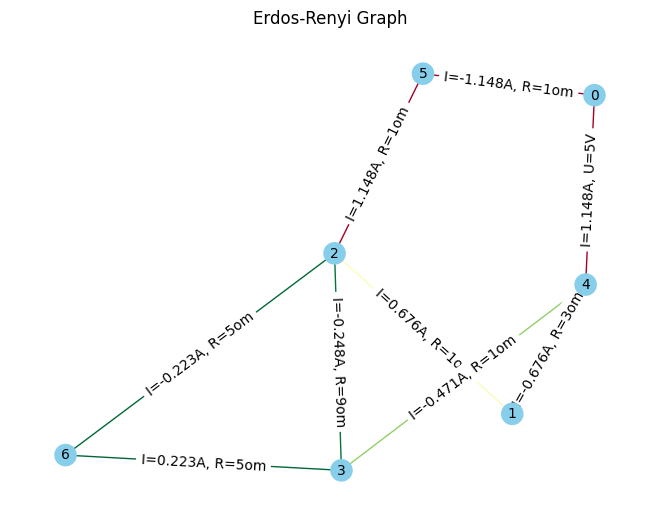

In [276]:
# Try it yourself! if it's awful just try again i guess..
n = 7
edges =  random_erdos_renyi_connected_graph(n)
draw_solution(edges,True,"Erdos-Renyi Graph") 

#### Grafy 3-regularne

/tmp/ipykernel_99722/1223105127.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')#'Greys',1


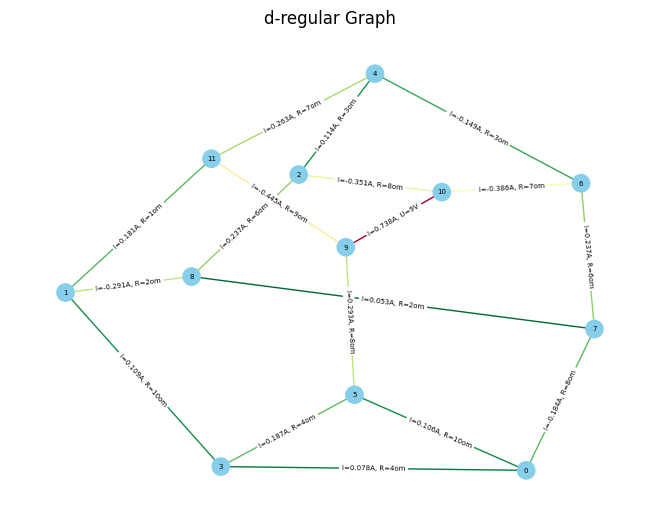

In [279]:
n = 12
d = 3
edges =  random_regular_graph(d,n)
draw_solution(edges,True,"d-regular Graph") 

#### Grafy z mostkami 

/tmp/ipykernel_99722/1223105127.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')#'Greys',1


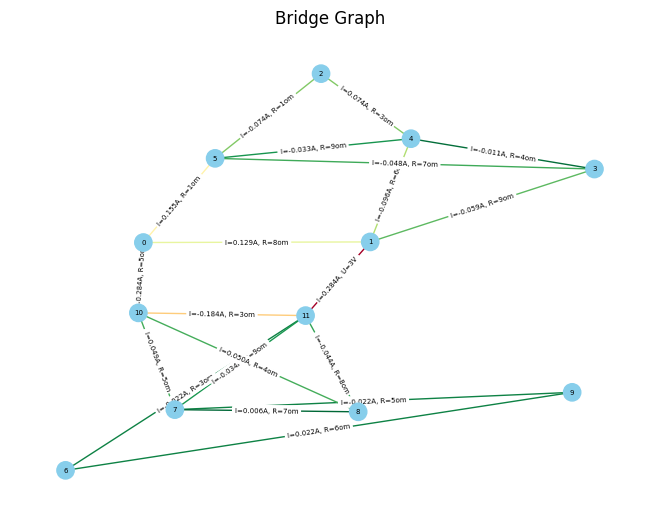

In [287]:
n = 6
edges = random_bridge_graph(n)
draw_solution(edges,True, "Bridge Graph")

#### Grafy typu siatka 2d

/tmp/ipykernel_99722/1223105127.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')#'Greys',1


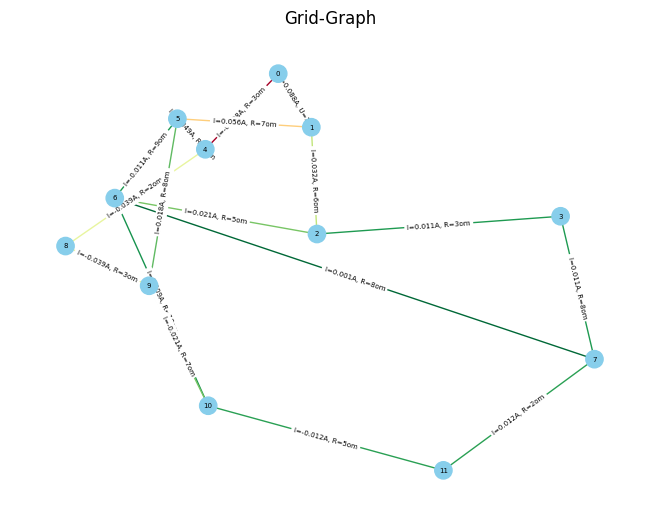

In [292]:
n = 3
m = 4 
edges = create_grid_graph(n,m)
draw_solution(edges,True,"Grid-Graph") 